In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [5]:
#from keras.utils import to_categorical

In [4]:
from tensorflow.keras.utils import to_categorical

In [6]:
mnist = fetch_openml("mnist_784", version=1)
type(mnist)

sklearn.utils.Bunch

In [8]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [11]:
type(mnist.data)

pandas.core.frame.DataFrame

In [13]:
type(mnist.target)

pandas.core.series.Series

In [20]:
# X= (mnist.data / 255).reshape(len(mnist.data), 28, 28, 1)
# y = to_categorical(mnist.target.astype(np.int),10)

In [24]:
#mnist.data.values
X = mnist.data.values
y = mnist.target.values
X = (X /255).reshape(len(X), 28, 28, 1)
y = to_categorical(y.astype(np.int),10)

In [19]:
X = mnist.data.to_numpy()
y = mnist.target.to_numpy()
X = (X /255).reshape(len(X), 28, 28, 1)
y = to_categorical(y.astype(np.int),10)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

7


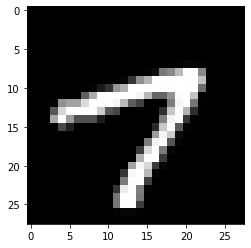

In [29]:
import matplotlib.pyplot as plt

p = mnist.data.values[101].reshape(28,28)

plt.imshow(p,cmap="gray")
# plt.imshow(p,cmap="bone")
print(mnist.target.values[101])

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [43]:
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="Same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10,activation="softmax"))

In [44]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)             

In [46]:
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
490/490 - 113s - loss: 0.1934 - accuracy: 0.9393
Epoch 2/10
490/490 - 109s - loss: 0.0540 - accuracy: 0.9828
Epoch 3/10
490/490 - 110s - loss: 0.0388 - accuracy: 0.9877
Epoch 4/10
490/490 - 108s - loss: 0.0274 - accuracy: 0.9911
Epoch 5/10
490/490 - 107s - loss: 0.0223 - accuracy: 0.9927
Epoch 6/10
490/490 - 106s - loss: 0.0172 - accuracy: 0.9943
Epoch 7/10
490/490 - 110s - loss: 0.0163 - accuracy: 0.9948
Epoch 8/10
490/490 - 100s - loss: 0.0145 - accuracy: 0.9950
Epoch 9/10
490/490 - 99s - loss: 0.0107 - accuracy: 0.9964
Epoch 10/10
490/490 - 102s - loss: 0.0099 - accuracy: 0.9970


In [47]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)

KeyError: 'acc'

In [48]:
hist.history['accuracy']

[0.996387779712677,
 0.9969183802604675,
 0.9971428513526917,
 0.997204065322876,
 0.9978571534156799,
 0.9975510239601135,
 0.9975510239601135,
 0.9979591965675354,
 0.9981224536895752,
 0.9982448816299438]

In [49]:
hist.history['loss']

[0.010901047848165035,
 0.008585446514189243,
 0.0076593453995883465,
 0.008846891112625599,
 0.006743262521922588,
 0.006818185560405254,
 0.007338152267038822,
 0.006279483903199434,
 0.0056188348680734634,
 0.004990904591977596]

In [50]:
loss, acc = model.evaluate(X_test,y_test)

657/657 [==============================] - 12s 16ms/step - loss: 0.0427 - accuracy: 0.9920


In [51]:
print("손실값:", round(loss,3))
print("정확도:", round(acc,3))

손실값: 0.043
정확도: 0.992


In [52]:
y_pred=model.predict(X_test)
print(y_pred[0:3])

[[1.8538034e-10 1.1636603e-16 2.1662976e-15 1.6510259e-17 5.0998986e-15
  2.1286257e-06 9.9999785e-01 7.9949211e-21 1.2494738e-08 9.6611612e-15]
 [4.9008433e-18 7.5653312e-20 1.0000000e+00 2.9167884e-17 2.8572450e-23
  2.0327587e-20 3.0154284e-20 8.2183419e-16 2.3835582e-09 4.2901143e-24]
 [1.6541440e-24 5.8503325e-15 2.2070044e-10 1.6189228e-13 4.6335716e-17
  2.0413190e-23 7.8099281e-25 1.0000000e+00 1.9145892e-20 7.1376249e-18]]


In [53]:
y_pred_class = model.predict_classes(X_test)
print(y_pred_class[0:3])

C:\Users\scarl\.conda\envs\my_tensor\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[6 2 7]
